# State of the Union

## Topic Modeling with *topicmodels*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
# If you are using the jupyter/datascience-notebook docker image to run the notebooks in this repository,
# open a terminal window and run this first:
#
#   conda install r-topicmodels

library(tidyverse)
library(tm)
library(topicmodels)

options(stringsAsFactors = FALSE)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
s <- SimpleCorpus(VectorSource(d$Text))

m <- DocumentTermMatrix(
    s,
    control=list(
        removePunctuation=TRUE,
        removeNumbers=TRUE,
        stopwords=TRUE,
        stemming=TRUE,
        minWOrdLength=3
    )
)

In [4]:
lda_model <- LDA(x = m, k = 6)

In [5]:
terms(lda_model, 10)

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
must,will,will,american,will,american
will,american,year,year,america,will
year,now,america,work,american,america
america,can,american,will,peopl,year
american,year,must,peopl,nation,thank
nation,peopl,can,job,world,countri
new,know,govern,can,year,one
work,america,peopl,new,countri,new
everi,job,program,make,secur,nation
can,make,nation,america,terrorist,peopl


## Visualization

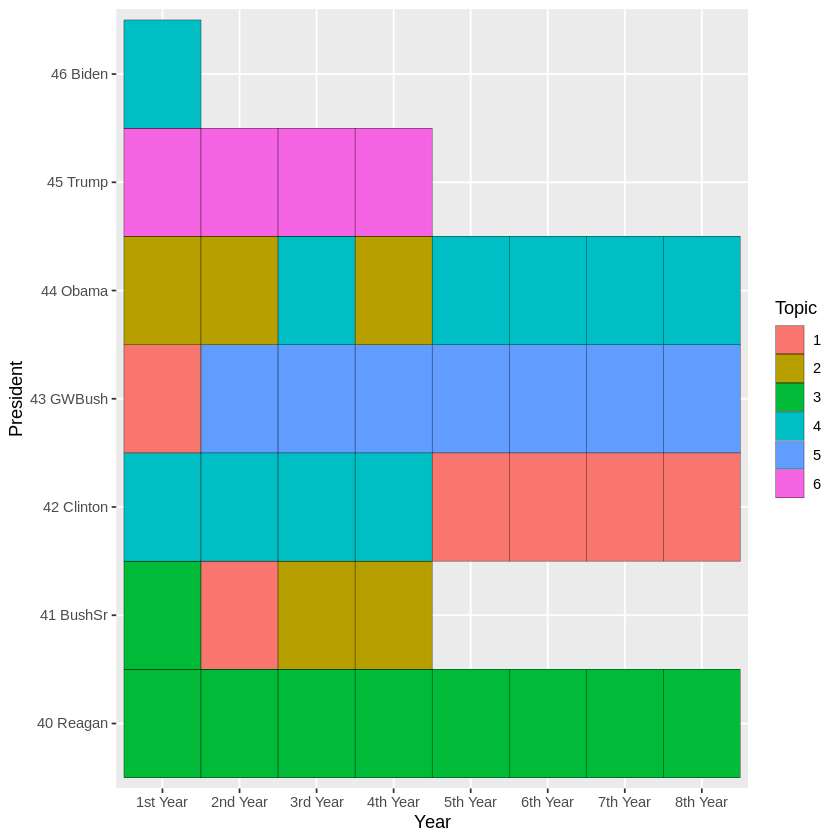

In [6]:
data.frame(President=d$President, Year=d$Year, Topic=factor(topics(lda_model))) %>%
    ggplot(aes(x=Year, y=President, fill=Topic)) +
    geom_tile(color="black")